In [1]:
import nltk
from nltk.stem.porter import PorterStemmer
import string
import re
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords
num_regex = re.compile('^[+-]?[0-9]+\.?[0-9]*$')

In [2]:
stemmer = LancasterStemmer()
def stem_tokens(tokens,stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

In [3]:
stop_words = set(stopwords.words('english'))

#punctuation list
s = list(string.punctuation)

def tokenize(string):
    tokens = nltk.word_tokenize(string)
    for index, token in enumerate(tokens):
        if token == '@' and (index+1) < len(tokens):
            tokens[index+1] = '@' + re.sub('[0-9]+.*', '', tokens[index+1])
            tokens.pop(index)
    #remove english stop word from tokens
    filtered_sentence = [w for w in tokens if not w in stop_words]
    
    #remove punctuation 
    tt = [i for i in filtered_sentence if not i in s]
    
    #Apply stemming 
    stems_word = stem_tokens(tt,stemmer)
    
    return stems_word

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_excel('training_set_rel3.xls')
data.head()
df = data[data['essay_set']==2]
x = df['essay']
Y = df['domain1_score']

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

In [7]:
tfidf = TfidfVectorizer(tokenizer=tokenize,min_df=1,max_features=1000).fit(x)
X = tfidf.transform(x)


In [8]:
from sklearn.cross_validation import train_test_split
train_x,test_x,train_y,test_y= train_test_split(X,Y,random_state=0,test_size=0.1)

/home/saddam/ML/venv2/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn import svm
model = svm.SVC(C=0.7,gamma=1)
model.fit(train_x,train_y)
model.score(test_x,test_y)

0.65000000000000002

In [10]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()
lmodel.fit(train_x,train_y)
lmodel.score(test_x,test_y)

-0.78505097962900861

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier(n_neighbors=13)
kmodel.fit(train_x,train_y)
 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [12]:
kmodel.score(test_x,test_y)

0.52222222222222225

In [13]:
from sklearn.naive_bayes import GaussianNB
gmodel= GaussianNB()
tr_x=train_x.toarray()
tr_y=train_y.as_matrix()
te_x=test_x.toarray()
te_y=test_y.as_matrix()
gmodel.fit(tr_x,tr_y)
gmodel.score(te_x,te_y)

0.37777777777777777

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(te_y,gmodel.predict(te_x))

1.1055555555555556

In [15]:
from sklearn.linear_model import SGDRegressor
sgmodel = SGDRegressor(alpha=0.0001,max_iter=1000)
sgmodel.fit(train_x,train_y)
sgmodel.score(test_x,test_y)

0.47860354841996589

In [16]:
mean_squared_error(test_y,sgmodel.predict(test_x))

0.32442445876091019

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_log_error,mean_squared_error,median_absolute_error,r2_score


In [18]:
print 'SGDregressor mean_squared_log_error :%f' % mean_squared_log_error(test_y,sgmodel.predict(test_x))
print 'SGDregressor mean_absolute_error :%f'%mean_absolute_error(test_y,sgmodel.predict(test_x))
print 'SGDregressor median_absolute_error :%f' % median_absolute_error(test_y,sgmodel.predict(test_x))
print 'SGDregressor mean_squared_error :%f' % mean_squared_error(test_y,sgmodel.predict(test_x))
print 'SGDregressor r2_score :%f' % r2_score(test_y,sgmodel.predict(test_x))

SGDregressor mean_squared_log_error :0.022629
SGDregressor mean_absolute_error :0.442997
SGDregressor median_absolute_error :0.361554
SGDregressor mean_squared_error :0.324424
SGDregressor r2_score :0.478604


In [19]:
print mean_absolute_error(test_y,model.predict(test_x))
print mean_squared_error(test_y,model.predict(test_x))

0.383333333333
0.45


In [20]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_y,sgmodel.predict(test_x))

0.48023725190762645

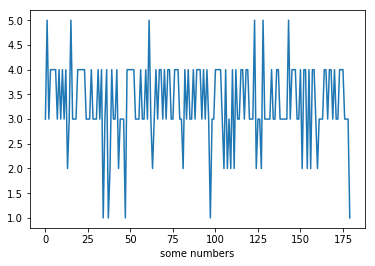

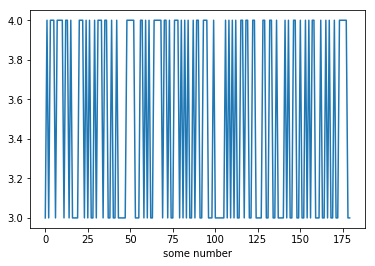

In [21]:
import matplotlib.pyplot as plt
a = test_y.tolist()
plt.xlabel('some numbers')
plt.plot(a)
plt.show()
plt.xlabel('some number')
plt.plot(model.predict(test_x))
plt.show()

In [22]:
pd.DataFrame({'actual':test_y.tolist(),'SVM':model.predict(test_x).tolist(),'linear':lmodel.predict(test_x).tolist(),'SGRegra':sgmodel.predict(test_x).tolist(),'kmodel':kmodel.predict(test_x),'gaumodel':gmodel.predict(te_x)})

,SGRegra,SVM,actual,gaumodel,kmodel,linear
0,3.876069,3.0,3.0,4.0,4.0,3.096282
1,4.611763,4.0,5.0,4.0,4.0,3.448218
2,3.520506,3.0,3.0,3.0,3.0,3.048366
3,3.587472,4.0,4.0,3.0,4.0,3.730954
4,4.631817,4.0,4.0,4.0,4.0,4.481997
5,3.832271,4.0,4.0,4.0,3.0,2.929192
6,2.987439,3.0,4.0,3.0,3.0,3.844121
7,3.703144,4.0,3.0,3.0,4.0,4.155974
8,3.388018,4.0,4.0,5.0,4.0,4.661948
9,3.502245,4.0,3.0,5.0,4.0,4.259367


In [23]:
"""from sklearn import svm, grid_search
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X,y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_ """

"from sklearn import svm, grid_search\nfrom sklearn.model_selection import GridSearchCV\ndef svc_param_selection(X,y, nfolds):\n    Cs = [0.001, 0.01, 0.1, 1, 10]\n    gammas = [0.001, 0.01, 0.1, 1]\n    param_grid = {'C': Cs, 'gamma' : gammas}\n    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)\n    grid_search.fit(X, y)\n    grid_search.best_params_\n    return grid_search.best_params_ "

In [24]:
#y = df['domain1_score']
#svc_param_selection(X,y,5)

In [25]:
sg = sgmodel.predict(test_x).tolist()
sv = model.predict(test_x).tolist()
li = lmodel.predict(test_x).tolist()
ac = test_y.tolist()
kn = kmodel.predict(test_x).tolist()
pd.DataFrame({'Actual ':ac,'sv ':sv,'li ':li,'sg ':sg,'kn':kn})

,Actual,kn,li,sg,sv
0,3.0,4.0,3.096282,3.876069,3.0
1,5.0,4.0,3.448218,4.611763,4.0
2,3.0,3.0,3.048366,3.520506,3.0
3,4.0,4.0,3.730954,3.587472,4.0
4,4.0,4.0,4.481997,4.631817,4.0
5,4.0,3.0,2.929192,3.832271,4.0
6,4.0,3.0,3.844121,2.987439,3.0
7,3.0,4.0,4.155974,3.703144,4.0
8,4.0,4.0,4.661948,3.388018,4.0
9,3.0,4.0,4.259367,3.502245,4.0


In [26]:
new = []
for i in range(180):
    n = (float(float(float(sv[i]*3.0)+float(sg[i]*2.0)+float(li[i])+float(kn[i]*0.5))/6.5))
    new.append(n)
pd.DataFrame({'Ac ':test_y,'New ':new})

,Ac,New
2380,3.0,3.361295
2614,5.0,4.103345
2957,3.0,3.167597
2250,4.0,3.831677
3505,4.0,4.268559
2919,4.0,3.706728
3493,4.0,3.126000
1965,3.0,3.932656
2681,4.0,3.913536
3518,3.0,3.886747


In [27]:
mean_absolute_error(test_y,np.array(new))

0.45165947098078052

In [28]:
from sklearn.metrics import accuracy_score
mean_squared_error(test_y,np.array(new))

0.38491136371397783

In [29]:
X

<1800x1000 sparse matrix of type '<type 'numpy.float64'>'
	with 154337 stored elements in Compressed Sparse Row format>

In [30]:
sing = X.toarray()
sing.shape

(1800, 1000)

In [31]:
 U, s, V = np.linalg.svd(sing, full_matrices=False)

In [32]:
s.shape

(1000,)

In [33]:
m = 0
for i in range(1000):
    j = float(s[i])
    if j >= 1.3:
          m =m+1
print m

238


In [34]:
U.shape

(1800, 1000)

In [35]:
V.shape

(1000, 1000)

In [36]:
s.shape

(1000,)

In [37]:
reduce = len(s)-m
#print reduce
ua = U.shape[1]-reduce
u = U[:,:ua]
print u.shape
v = V.shape[0]-reduce
v = V[:v]
v.shape

(1800, 238)


(238, 1000)

In [38]:
from numpy import diag
S= diag(s[:m])
S.shape

(238, 238)

In [39]:
S

array([[ 18.90751971,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   6.31146598,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   5.72393663, ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [  0.        ,   0.        ,   0.        , ...,   1.30518667,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          1.30409638,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   1.30328604]])

In [40]:
print u.shape
print S.shape
print v.shape

(1800, 238)
(238, 238)
(238, 1000)


In [41]:
u.shape

(1800, 238)

In [42]:
S.shape

(238, 238)

In [43]:
v.shape

(238, 1000)

In [44]:
u = np.matrix(u)
s = np.matrix(S)
v = np.matrix(v)

In [45]:
svd_matrix = u*s*v

In [46]:
svd_matrix.shape

(1800, 1000)

In [47]:
from scipy import sparse
full_svd = sparse.csc_matrix(svd_matrix)

In [48]:
full_svd

<1800x1000 sparse matrix of type '<type 'numpy.float64'>'
	with 1800000 stored elements in Compressed Sparse Column format>

In [98]:
train_x,test_x,train_y,test_y= train_test_split(full_svd,Y,random_state=0,test_size=0.1)

In [99]:
train_x.shape

(1620, 1000)

In [100]:
train_y.shape

(1620,)

In [101]:
from sklearn import svm
model = svm.SVC(C=0.7,gamma=1)
model.fit(train_x,train_y)
model.score(test_x,test_y)

0.65555555555555556

In [102]:
from sklearn.linear_model import SGDRegressor
sgmodel = SGDRegressor(alpha=0.0001,max_iter=1000)
sgmodel.fit(train_x,train_y)
sgmodel.score(test_x,test_y)

0.47637682412899995

In [103]:
print 'SGDregressor mean_squared_log_error :%f' % mean_squared_log_error(test_y,sgmodel.predict(test_x))
print 'SGDregressor mean_absolute_error :%f'%mean_absolute_error(test_y,sgmodel.predict(test_x))
print 'SGDregressor median_absolute_error :%f' % median_absolute_error(test_y,sgmodel.predict(test_x))
print 'SGDregressor mean_squared_error :%f' % mean_squared_error(test_y,sgmodel.predict(test_x))
print 'SGDregressor r2_score :%f' % r2_score(test_y,sgmodel.predict(test_x))

SGDregressor mean_squared_log_error :0.023002
SGDregressor mean_absolute_error :0.438118
SGDregressor median_absolute_error :0.363394
SGDregressor mean_squared_error :0.325810
SGDregressor r2_score :0.476377


In [108]:
tr = train_y
ty = test_y

In [109]:
train_y= pd.get_dummies(train_y)
 
test_y = pd.get_dummies(test_y)
test_y = test_y.assign(e=[0 for i in range(180)])
test_y



 

,1.0,2.0,3.0,4.0,5.0,e
2380,0,0,1,0,0,0
2614,0,0,0,0,1,0
2957,0,0,1,0,0,0
2250,0,0,0,1,0,0
3505,0,0,0,1,0,0
2919,0,0,0,1,0,0
3493,0,0,0,1,0,0
1965,0,0,1,0,0,0
2681,0,0,0,1,0,0
3518,0,0,1,0,0,0


In [114]:
test_y.shape
train_x=train_x.toarray()
len(train_x)

1620

In [116]:
test_x = test_x.toarray()

In [120]:
test_y
train_y

,1.0,2.0,3.0,4.0,5.0,6.0
2612,0,0,0,1,0,0
2082,0,0,0,0,1,0
2687,0,0,1,0,0,0
1788,0,0,0,1,0,0
1841,0,0,1,0,0,0
3397,0,0,0,1,0,0
2841,0,0,0,1,0,0
3073,0,0,1,0,0,0
3244,0,0,0,1,0,0
2332,0,0,0,1,0,0


In [124]:
import tensorflow as tf
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500


n_classes = 6

batch_size = 128

x = tf.placeholder('float',[None, 1000])
y = tf.placeholder('float')
k = tf.placeholder('float',[None, 1000])


def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([1000,n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}
    
    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1,n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2,n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3,n_classes])),
                    'biases':tf.Variable(tf.random_normal  ([n_classes]))}
   

    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)
    
    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)
    
    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3, output_layer['weights']) + output_layer['biases']
    
    return output


def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y))
    optimizer = tf.train.AdamOptimizer().minimize(cost)

    hm_epochs = 50

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            i = 0
            while i<len(train_x):
                start = i
                end = i+batch_size
                
                batch_x = np.array(train_x[start:end])
                batch_y = np.array(train_y[start:end])
                
                _, c = sess.run([optimizer, cost], feed_dict = {x:batch_x, y:batch_y})
                epoch_loss += c
                i +=batch_size
                
            print('Epoch', epoch, 'completed out of', hm_epochs, 'loss:', epoch_loss)
        correct = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1))
        accuracy = tf.reduce_mean(tf.cast(correct,'float'))
        print('Accuracy:',accuracy.eval({x:test_x, y:test_y}))
        prediction=tf.argmax(y,1)
        #print prediction.eval(feed_dict={k:test_x})


train_neural_network(x)

('Epoch', 0, 'completed out of', 50, 'loss:', 37835.862060546875)
('Epoch', 1, 'completed out of', 50, 'loss:', 19806.506591796875)
('Epoch', 2, 'completed out of', 50, 'loss:', 14788.805725097656)
('Epoch', 3, 'completed out of', 50, 'loss:', 10780.574340820312)
('Epoch', 4, 'completed out of', 50, 'loss:', 8607.5272827148438)
('Epoch', 5, 'completed out of', 50, 'loss:', 6937.0986328125)
('Epoch', 6, 'completed out of', 50, 'loss:', 5546.9519958496094)
('Epoch', 7, 'completed out of', 50, 'loss:', 4465.5407867431641)
('Epoch', 8, 'completed out of', 50, 'loss:', 3827.7808074951172)
('Epoch', 9, 'completed out of', 50, 'loss:', 3369.9714660644531)
('Epoch', 10, 'completed out of', 50, 'loss:', 3309.8638610839844)
('Epoch', 11, 'completed out of', 50, 'loss:', 3458.6237106323242)
('Epoch', 12, 'completed out of', 50, 'loss:', 5017.8346862792969)
('Epoch', 13, 'completed out of', 50, 'loss:', 5088.2981338500977)
('Epoch', 14, 'completed out of', 50, 'loss:', 3688.051570892334)
('Epoch',